# Finding Heavy Traffic Indicators on I-94

In this project, we will be analyzing a dataset about the westbound traffic on the I-94 Interstate highway, in the proximity of a station located between Minneapolis and Saint Paul that recorded westbound traffic movement.

Our goals are to determine and find indicators of heavy traffic by utilizing exploratory data visualization with plots and graphs imported from several Python modules. 

By visualizing these indicators, such as weather type or time of the week, we can successfully find connections between trends in heavier traffic and a certain indicator.

## Summary of Results

After analyzing the data through graphs and plots, we found that the indicators for heavy traffic were grouped in time and weather. For time indicators, warmer months, business days, and rush hours on business days showed high levels of traffic volume. For weather indicators, mildly tumultuous weather including snow and rain showed high levels of traffic volume as well.

# Exploring Data to Find Overall Traffic Volume Distribution

In [1]:
import pandas as pd

# Read in the data
traffic = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')

In [2]:
traffic.head(5)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [3]:
traffic.tail(5)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,None,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


In [4]:
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


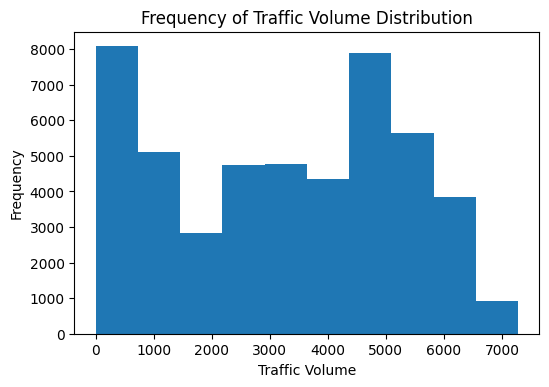

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

#Plot histogram of traffic volume distribution to identify heavy traffic volume points
traffic['traffic_volume'].plot.hist()
plt.xlabel('Traffic Volume')
plt.title('Frequency of Traffic Volume Distribution')
plt.show()

In [6]:
traffic['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

Analyzing the distribution of traffic volume, 25% of the time, 1193 cars or less were moving westbound within proximity of the station. 75% of the time, 4933 cars or more were moving westbound.

# Time Indicators and Traffic Volume Comparisons

## Comparing Day and Night Traffic Volumes

In [7]:
#Convert date_time column to datetime to standardize date and time format
traffic['date_time'] = pd.to_datetime(traffic['date_time'])
traffic['date_time'].dt.hour

0         9
1        10
2        11
3        12
4        13
         ..
48199    19
48200    20
48201    21
48202    22
48203    23
Name: date_time, Length: 48204, dtype: int64

In [8]:
#Set daytime hours after 7 and before 19 to plot traffic volume graphs
day = traffic.copy()[(traffic['date_time'].dt.hour >= 7)&(traffic['date_time'].dt.hour < 19)]
print(day.shape)

(23877, 9)


In [9]:
#Set nighttime hours before 7 and after 19 to plot traffic volume graphs
night = traffic.copy()[(traffic['date_time'].dt.hour >= 19) | (traffic['date_time'].dt.hour < 7)]
print(night.shape)

(24327, 9)


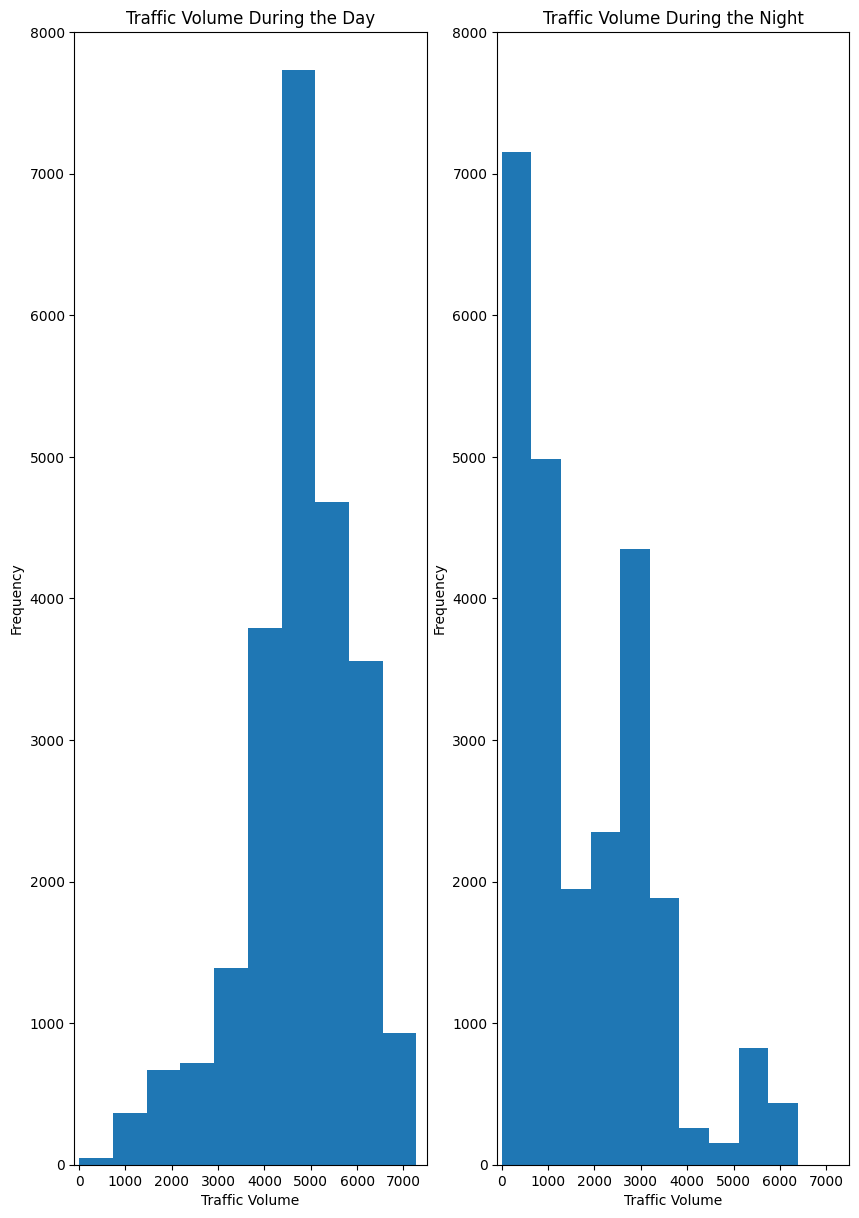

In [10]:
plt.figure(figsize= (10,15))
plt.subplot(1,2,1)
plt.title("Traffic Volume During the Day")
plt.xlabel("Traffic Volume")
plt.xlim(-100, 7500)
plt.ylim(0, 8000)
day['traffic_volume'].plot.hist()

plt.subplot(1,2,2)
plt.title("Traffic Volume During the Night")
plt.xlabel("Traffic Volume")
plt.xlim(-100, 7500)
plt.ylim(0, 8000)
night['traffic_volume'].plot.hist()

plt.show()

In [11]:
day['traffic_volume'].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [12]:
night['traffic_volume'].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

After generating our histograms for traffic volume during daytime and nighttime hours, we can evaluate that the daytime histogram has a slightly positive distribution trend, before tapering off in volume into the later hours of the day. 
For the nighttime histogram, there is a strong negative distribution, with most frequency in the earlier hours of the night and tapering off into the later hours.

Looking at the summary statistics of each of the histogram's data: 

25% of the time, 4252 cars or less are heading westbound during the day, and 75% of the time, 5559 cars or more are heading westbound.  

In comparison, 25% of the time, only 530 cars or less are heading westbound during the night, and 75% of the time, 2819 cars or more are heading westbound. 

Due to the comparably lesser values for traffic volume and strong negative distribution for the nighttime data, it would not be an indicator for heavy traffic. Moving forward, we will instead focus solely on the daytime dataset.

## Finding Heavy Traffic Indicators in Daytime Data

In [13]:
day['month'] = day['date_time'].dt.month

In [14]:
by_month= day.groupby('month').mean() 

In [15]:
by_month["traffic_volume"]

month
1     4495.613727
2     4711.198394
3     4889.409560
4     4906.894305
5     4911.121609
6     4898.019566
7     4595.035744
8     4928.302035
9     4870.783145
10    4921.234922
11    4704.094319
12    4374.834566
Name: traffic_volume, dtype: float64

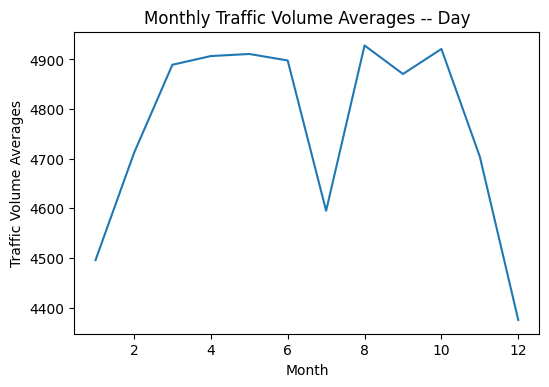

In [16]:
by_month["traffic_volume"].plot.line()
plt.title('Monthly Traffic Volume Averages -- Day')
plt.ylabel('Traffic Volume Averages')
plt.xlabel('Month')
plt.show()

Looking at the monthly traffic volume averages, traffic volumes start to increase around March and stagnate at a high volume until around June. From there, a sharp decline in volume occurs during the month of July, before increasing again into August, with only a slight decrease in September until peaking one more time in October. Into November and December, traffic drastically decreases.

This shows that time indicators for heavy traffic volumes are higher during warmer months (March-October) compared to colder months (November-February).

In [17]:
day['dayofweek'] = day['date_time'].dt.dayofweek
by_dayofweek = day.groupby('dayofweek').mean()
by_dayofweek['traffic_volume'] # 0 = Monday, 6 = Sunday

dayofweek
0    4893.551286
1    5189.004782
2    5284.454282
3    5311.303730
4    5291.600829
5    3927.249558
6    3436.541789
Name: traffic_volume, dtype: float64

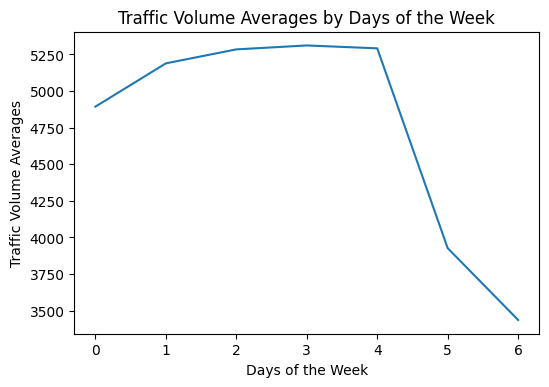

In [18]:
by_dayofweek['traffic_volume'].plot.line()
plt.title("Traffic Volume Averages by Days of the Week")
plt.xlabel("Days of the Week"); plt.ylabel("Traffic Volume Averages")
plt.show()

During business days, traffic volume averages are the highest, increasing from Monday and stagnating until Friday. Once Saturday comes around, traffic volume averages sharply decrease, and continues doing so going into Sunday.

In [19]:
day['hour'] = day['date_time'].dt.hour
business_days = day.copy()[day['dayofweek'] <= 4] # 4 == Friday
weekend = day.copy()[day['dayofweek'] >= 5] # 5 == Saturday
by_hour_business = business_days.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()

print(by_hour_business['traffic_volume'])
print(by_hour_weekend['traffic_volume'])

hour
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
Name: traffic_volume, dtype: float64
hour
7     1589.365894
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
Name: traffic_volume, dtype: float64


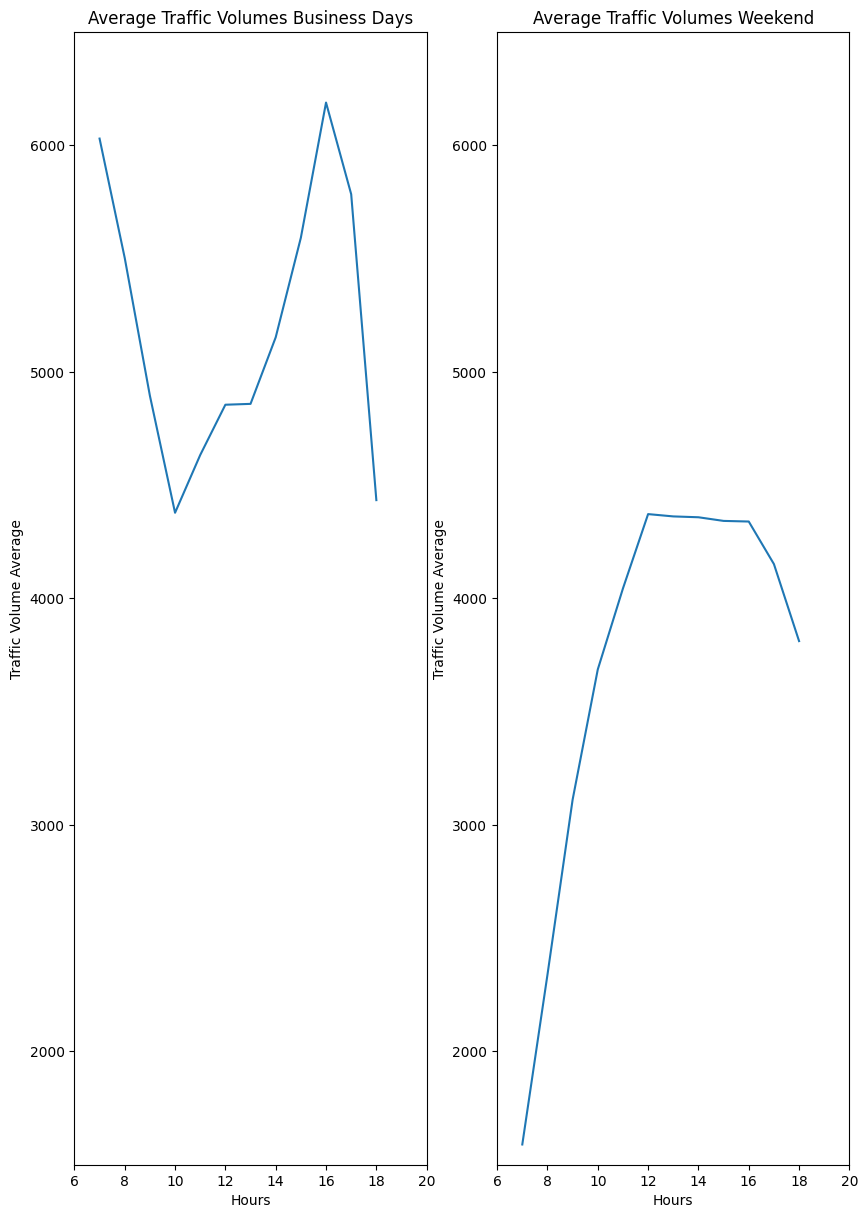

In [20]:
plt.figure(figsize=(10,15))
plt.subplot(1,2,1)
by_hour_business['traffic_volume'].plot.line()
plt.title("Average Traffic Volumes Business Days")
plt.xlabel("Hours")
plt.ylabel("Traffic Volume Average")
plt.ylim(1500,6500)
plt.xlim(6,20)
plt.subplot(1,2,2)
by_hour_weekend['traffic_volume'].plot.line()
plt.title("Average Traffic Volumes Weekend")
plt.xlabel("Hours")
plt.ylabel("Traffic Volume Average")
plt.ylim(1500,6500)
plt.xlim(6,20)

plt.show()

In [21]:
by_hour_business['traffic_volume'].describe()

count      12.000000
mean     5192.498812
std       615.622781
min      4378.419118
25%      4799.891475
50%      5024.132518
75%      5640.880110
max      6189.473647
Name: traffic_volume, dtype: float64

In [22]:
by_hour_weekend['traffic_volume'].describe()

count      12.000000
mean     3709.128440
std       911.307344
min      1589.365894
25%      3542.880206
50%      4098.037442
75%      4346.478609
max      4372.482883
Name: traffic_volume, dtype: float64

Comparing the charts and data summaries, there are higher volumes of traffic during business days compared to weekends: the total average amount of traffic volume for business days is around 5192 cars, while during the weekends the average totals to only around 3709 cars.
Looking at the chart for business day hours vs. traffic volume averages, the highest points of traffic volume is around 7:00 and 17:00: after 7:00, volume sharply declines until 11:00, and slowly increases until it peaks at above 6000 cars around 17:00, when the second rush hour starts. Afterwards, it sharply declines again into the later hours of the day after 17:00.
For weekends, volume slowly increases from 7:00 and peaks at above 4000 cars at 12:00, stagnating until 16:00 and then slowly tapering off.

Regarding time indicators, rush hour at 7:00 and 17:00 for business days indicate heavy traffic volume, peaking above 6000 cars.

## Finding Heavy Traffic Indicators in Nighttime Data

In [23]:
night['month'] = night['date_time'].dt.month
by_nightmonth= night.groupby('month').mean() 

In [24]:
by_nightmonth["traffic_volume"]

month
1     1616.610448
2     1716.961841
3     1817.272029
4     1786.116598
5     1829.852518
6     1932.272727
7     1838.349193
8     1897.564079
9     1818.959858
10    1852.168591
11    1680.311799
12    1622.508393
Name: traffic_volume, dtype: float64

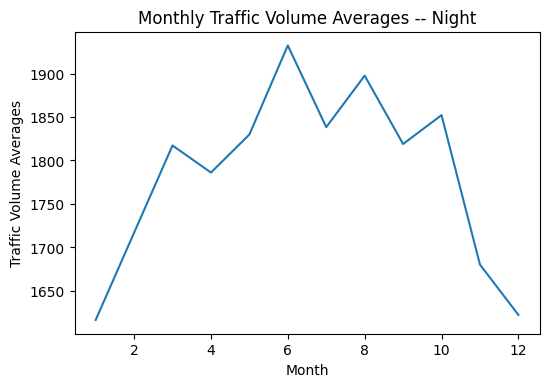

In [25]:
by_nightmonth["traffic_volume"].plot.line()
plt.title('Monthly Traffic Volume Averages -- Night')
plt.ylabel('Traffic Volume Averages')
plt.xlabel('Month')
plt.show()

Looking at the monthly traffic volume averages, traffic volumes tend to increase to a peak, decline, and then reach another peak in volume. Four peaks are within the following months: June, August, October, and March, in order of highest to lowest volumes. 

This shows that time indicators for heavy traffic volumes during the night also tend to be higher during warmer months (March-October) compared to colder months (November-February), but instead have sharp declines consistently within the warmer months.

In [26]:
night['dayofweek'] = night['date_time'].dt.dayofweek
by_dayofweek_night = night.groupby('dayofweek').mean()
by_dayofweek_night['traffic_volume'] # 0 = Monday, 6 = Sunday

dayofweek
0    1722.532692
1    1862.926571
2    1901.465710
3    1994.177959
4    2059.882336
5    1634.459412
6    1323.998273
Name: traffic_volume, dtype: float64

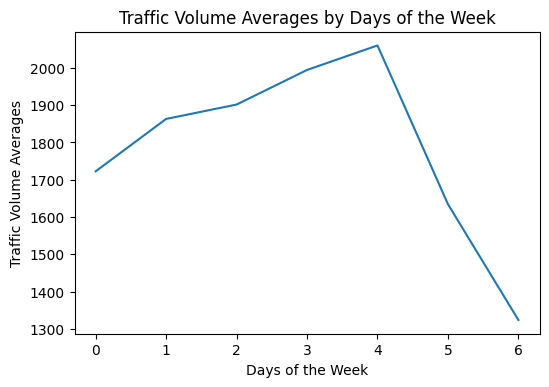

In [27]:
by_dayofweek_night['traffic_volume'].plot.line()
plt.title("Traffic Volume Averages by Days of the Week")
plt.xlabel("Days of the Week"); plt.ylabel("Traffic Volume Averages")
plt.show()

During business days, traffic volume averages are the highest, increasing slowly from Sunday's average volume of above 1700 cars, to the highest average on Friday. After Friday, traffic volume averages sharply decrease going into Saturday.

In [28]:
night['hour'] = night['date_time'].dt.hour
business_days_night = night.copy()[night['dayofweek'] <= 4] # 4 == Friday
weekend_night = night.copy()[night['dayofweek'] >= 5] # 5 == Saturday
by_hour_business_night = business_days_night.groupby('hour').mean()
by_hour_weekend_night = weekend_night.groupby('hour').mean()

print(by_hour_business_night['traffic_volume'])
print(by_hour_weekend_night['traffic_volume'])

hour
0      651.528971
1      396.913043
2      301.982818
3      362.289835
4      832.661096
5     2701.296703
6     5365.983210
19    3298.340426
20    2842.433004
21    2673.042807
22    2125.913104
23    1379.549728
Name: traffic_volume, dtype: float64
hour
0     1306.414035
1      805.128333
2      611.171986
3      393.611599
4      375.420168
5      639.237232
6     1089.100334
19    3220.234120
20    2815.039216
21    2658.445242
22    2384.368607
23    1699.050699
Name: traffic_volume, dtype: float64


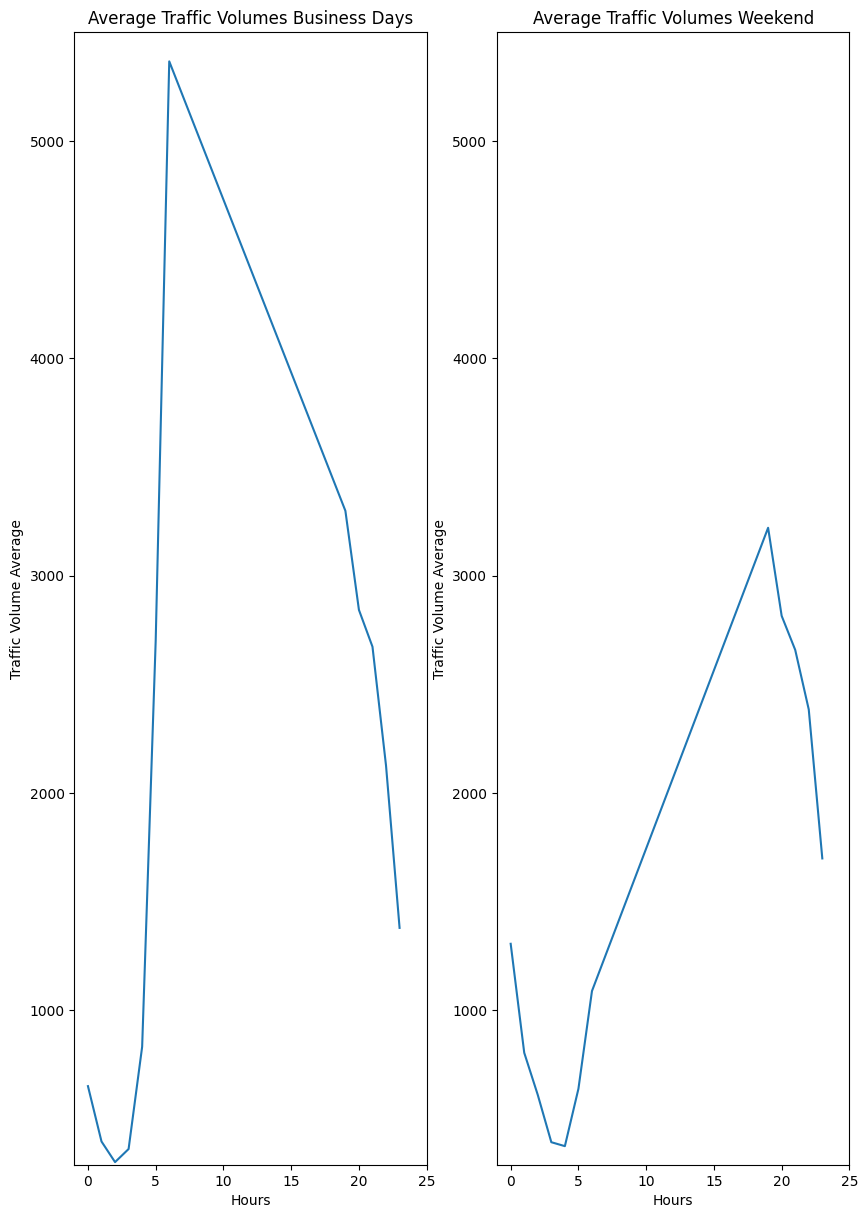

In [29]:
plt.figure(figsize=(10,15))
plt.subplot(1,2,1)
by_hour_business_night['traffic_volume'].plot.line()
plt.title("Average Traffic Volumes Business Days")
plt.xlabel("Hours")
plt.ylabel("Traffic Volume Average")
plt.ylim(290,5500)
plt.xlim(-1,25)
plt.subplot(1,2,2)
by_hour_weekend_night['traffic_volume'].plot.line()
plt.title("Average Traffic Volumes Weekend")
plt.xlabel("Hours")
plt.ylabel("Traffic Volume Average")
plt.ylim(290,5500)
plt.xlim(-1,25)

plt.show()

In [30]:
by_hour_business_night['traffic_volume'].describe()

count      12.000000
mean     1910.994562
std      1546.023517
min       301.982818
25%       587.874989
50%      1752.731416
75%      2736.580779
max      5365.983210
Name: traffic_volume, dtype: float64

In [31]:
by_hour_weekend_night['traffic_volume'].describe()

count      12.000000
mean     1499.768464
std      1025.188270
min       375.420168
25%       632.220921
50%      1197.757185
75%      2452.887766
max      3220.234120
Name: traffic_volume, dtype: float64

Comparing the charts and data summaries, there are slight higher volumes of traffic during business days compared to weekends: the total average amount of traffic volume for business days is around 1910 cars, while during the weekends the average totals to only around 1500 cars.
Looking at the chart for business day hours vs. traffic volume averages, the highest points of traffic volume is around 6:00 at above 5000 cars: after 6:00, volume sharply declines into the later hours.
For weekends, volume slowly increases from around 5:00 and peaks at above 3000 cars at 20:00, stagnating until 4pm and then slowly tapering off.
Both charts include a decline of volume from 00:00 until around 5:00, at which the traffic volume starts to increase again.

Regarding time indicators, rush hour at 6:00 for business days indicate heavy traffic volume, peaking above 5000 cars.

# Weather Indicators and Correlation

In [32]:
day.corr()['traffic_volume']

temp              0.128317
rain_1h           0.003697
snow_1h           0.001265
clouds_all       -0.032932
traffic_volume    1.000000
month            -0.022337
dayofweek        -0.416453
hour              0.172704
Name: traffic_volume, dtype: float64

The strongest correlation between traffic volume and weather is found with the 'temp' weather column, with a correlation above 0.13. 

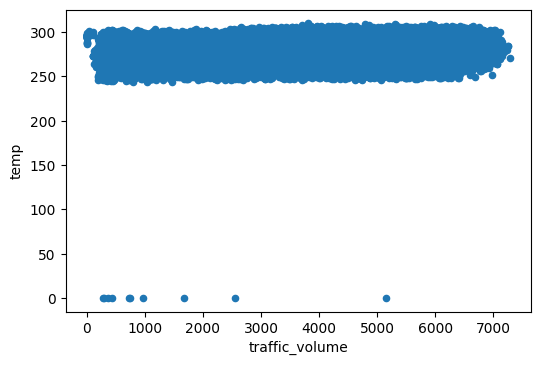

In [33]:
traffic.plot.scatter(x='traffic_volume', y='temp')

Looking at the scatterplot, there seems to be little correlation between traffic volume and temperature. This, and the list of correlations shown above with the 'traffic_volume' column, indicates that these weather columns are not reliable indicators for heavy traffic due to their low values of correlation.

In [34]:
by_weather_main = day.groupby('weather_main').mean()
by_weather_description = day.groupby('weather_description').mean()

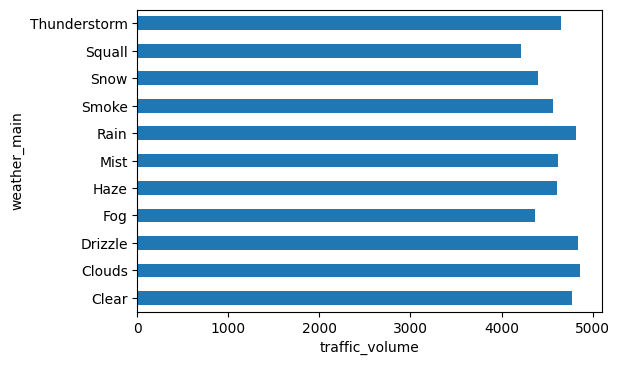

In [35]:
by_weather_main['traffic_volume'].plot.barh()
plt.xlabel('traffic_volume')
plt.show()

The bar graph for weather_main does not show traffic volume exceeding 5000 cars, or a particular weather type being a heavy traffic indicator, as most weather types have values above 4000 cars for traffic volume.

In [ ]:
by_weather_description['traffic_volume'].plot.barh(figsize=(10,15))
plt.xlabel('traffic_volume')
plt.show()

Three weather descriptions have traffic volume exceeding 5000 cars: 'proximity thunderstorm with drizzle', 'light rain and snow', and 'shower snow'. 'light rain and snow' and 'shower snow' both have the highest traffic volume values of all weather descriptions , with 'shower snow' being only slightly larger in value of the two.
Therefore, lightly tumultuous and 'bad' weather are strong heavy traffic indicators. 

# Conclusion

In this project, we aimed to find a few strong indicators for heavy traffic volumes utilizing data visualization of the I-95 westbound data recorded at a station between Minneapolis and Saint Paul. We found a few types of indicators for heavy traffic volume:
- Time indicators
    - Business days have higher traffic volumes compared to the weekends
        - Highest volumes were at rush hours at 7am and 5pm, for daytime, and 6am for nighttime
        - Daytime volumes at rush hour were relatively larger than nighttime volumes
    - Traffic volume is heavier during warmer months (March-October) compared to colder months (November-February)
- Weather indicators
    - Proximity thunderstorm with drizzle
    - Light rain and snow
    - Shower snow